In [1]:
import sys
sys.path.append('..')
import ugent

import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
from pyslise import PyslisePeriodic
from math import pi

def V(x):
    return x*x*(pi-x)

problem = PyslisePeriodic(V, 0, pi, tolerance=1e-14)

print(problem.eigenvaluesByIndex(0, 20))

[(0, 2.0294161514952878, 1), (1, 6.500490696092834, 1), (2, 7.015056863170594, 1), (3, 18.5847721423612, 1), (4, 18.66548144522064, 1), (5, 38.58162786527652, 1), (6, 38.62154254736281, 1), (7, 66.58204779229, 1), (8, 66.60536500769427, 1), (9, 102.58252598884063, 1), (10, 102.59772054976331, 1), (11, 146.58286509180914, 1), (12, 146.59352287793337, 1), (13, 198.58309805693517, 1), (14, 198.59097569656123, 1), (15, 258.5832607460919, 1), (16, 258.5893157594311, 1), (17, 326.5833777514895, 1), (18, 326.5881759903209, 1), (19, 402.5834632545595, 1)]


2.029416161543784
6.500490692706711
7.015056858984103


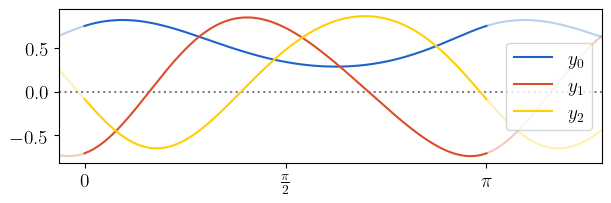

In [3]:
import numpy as np

xs = np.linspace(0, pi, 200)
fig, ax = plt.subplots(1,1, figsize=(7, 2))

ax.axhline(0, color="gray", ls=':')

for c, (i, E, fs) in zip(ugent.palet, problem.eigenpairsByIndex(0, 3)):
    print(E)
    [f] = fs
    fv = f(xs)[0,:]
    if i == 0:
        fv *= -1
    ax.plot(xs-pi, fv, color=c, alpha=0.3)
    ax.plot(xs, fv, color=c, label=f"$y_{{{i}}}$")
    ax.plot(xs+pi, fv, color=c, alpha=0.3)

ax.set_xticks([0, pi/2, pi])
ax.set_xticklabels(["$0$", "$\\frac{\\pi}{2}$", "$\\pi$"])
ax.set_xlim(-0.2, pi+.9)
ax.legend(loc="center right")
plt.savefig("matslise_periodic_eigenfunctions.pdf", bbox_inches="tight")
plt.show()

In [4]:
import numpy as np

def solve(tolerance):
    p = PyslisePeriodic(V, 0, pi, tolerance=tolerance)
    return p.eigenvaluesByIndex(0, 20)

exact = np.array(list(zip(*solve(1e-15)))[1])
for t in [1e-4, 1e-6, 1e-10]:
    found = np.array(list(zip(*solve(t)))[1])
    print(np.abs(exact - found))

[1.95822707e-07 3.78421747e-07 3.61368979e-08 1.18315739e-07
 1.48215200e-08 9.04301345e-08 9.11918505e-08 3.27521519e-07
 1.78796483e-07 2.71435752e-07 2.94521797e-07 2.68695857e-07
 2.68687984e-07 3.80848178e-07 3.81032322e-07 1.86340458e-07
 1.86336138e-07 1.36339281e-07 1.36335643e-07 8.04554929e-08]
[2.03348280e-08 4.20468602e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [5]:
andrew = [None, 6.5005, 7.0151, 18.5848, 18.6655, 38.5816, 38.6215, 66.5821, 66.6054, 102.5825, 102.5977, 146.5829, 146.5935, 198.5831, 198.5910, 258.5833, 258.5893, 326.5834, 326.5882, 402.5835]
vandenberghe = [None, 6.50049, 7.01506, 18.58477, 18.66548, 38.58162, 38.62154, 66.58204, 66.60537, 102.58252, 102.59772, 146.58286, 146.59352, 198.58310, 198.59998, 258.58326, 258.58931, 326.58338, 326.58817, 402.58347]
we = list(list(zip(*solve(1e-12)))[1])

In [11]:
with open("matslise_periodic_andrew.tex", 'w') as f:
    print("\\begin{tabular}{n{1}{0}n{3}{4}n{3}{5}n{3}{12}}", file=f)
    print("\\toprule", file=f)
    print("& {Andrew\\cite{andrew_correction_1989}} & {Vanden Berghe\cite{vandenberghe_modified_1995}} & {\pyslise{} ($10^{-12}$)} \\\\", file=f)
    print("\\midrule", file=f)
    for k, (a, b, c) in enumerate(zip(andrew, vandenberghe, we)):
        a = f"{a:.4f}" if a else ''
        b = f"{b:.5f}" if b else ''
        c = f"{c:.12f}" if c else ''
        print(f"{k} & {a} & {b} & {c} \\\\", file=f)
    print("\\bottomrule", file=f)
    print("\\end{tabular}", file=f)